In [1]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Carregando arquivo
df = pd.read_csv('store.csv')

In [3]:
#Abrindo arquivo
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


CustomerID - Id do cliente  
Genre - Genêro do cliente  
Age - idade do cliente  
Annual Income - Valor gasto anualmente  
Spending Score - Score de compra  

In [5]:
df.shape

(200, 5)

In [8]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [11]:
df.columns = ['IdCliente', 'Gênero', 'Idade', 'Renda Anual',
       'Nível de Gasto (1-100)']

In [12]:
df.head()

,IdCliente,Gênero,Idade,Renda Anual,Nível de Gasto (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
df.set_index('IdCliente', inplace=True)

In [15]:
df.head()

,Gênero,Idade,Renda Anual,Nível de Gasto (1-100)
IdCliente,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [16]:
#Passando para variável data somente duas colunas
data = df[['Renda Anual', 'Nível de Gasto (1-100)']]

In [17]:
data.head()

,Renda Anual,Nível de Gasto (1-100)
IdCliente,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


<AxesSubplot:xlabel='Gênero', ylabel='Renda Anual'>

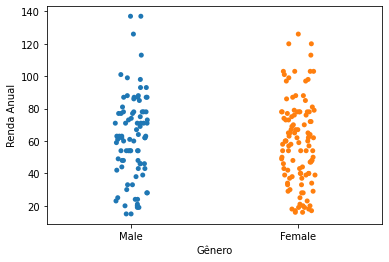

In [46]:
sns.stripplot(x='Gênero', y='Renda Anual', data=df)

<AxesSubplot:xlabel='Gênero', ylabel='Nível de Gasto (1-100)'>

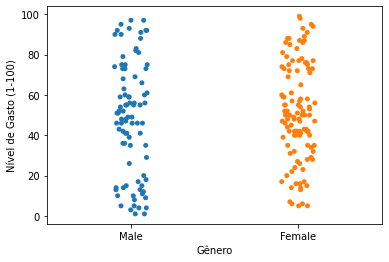

In [47]:
sns.stripplot(x='Gênero', y='Nível de Gasto (1-100)', data=df)

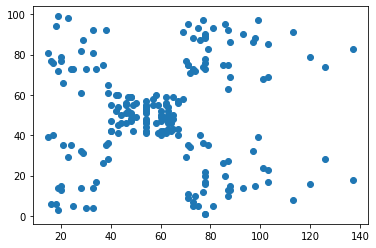

In [19]:
plt.scatter(data['Renda Anual'], data['Nível de Gasto (1-100)'])

Olhando para o gráfico, percebemos as divisões (cluisters) mas, o certo é usar a tecnica do cotovelo para descobrir o número certo.

#Identificar Quantidade de Clusters  

Método Elbow(cotovelo)

In [21]:
from sklearn.cluster import KMeans

In [23]:
X = data.values

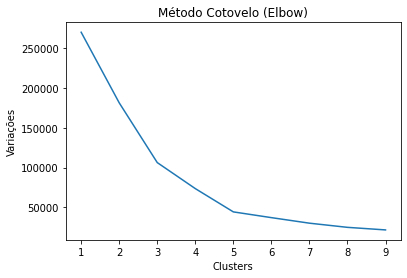

In [25]:
variaçoes = []
for i in range(1,10):
    kmeans=KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    variaçoes.append(kmeans.inertia_)
plt.plot(range(1,10), variaçoes)
plt.title('Método Cotovelo (Elbow)')
plt.xlabel('Clusters')
plt.ylabel("Variações")
plt.show()

In [26]:
#Treinando os dados com cluster já definido
kmeans_final = KMeans(n_clusters=5)

In [27]:
kmeans_final.fit(X)

KMeans(n_clusters=5)

In [30]:
#predição dos clusters
cluster_pred = kmeans_final.predict(X)


In [33]:
cluster_centro = kmeans_final.cluster_centers_
cluster_centro


array([[25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348]])

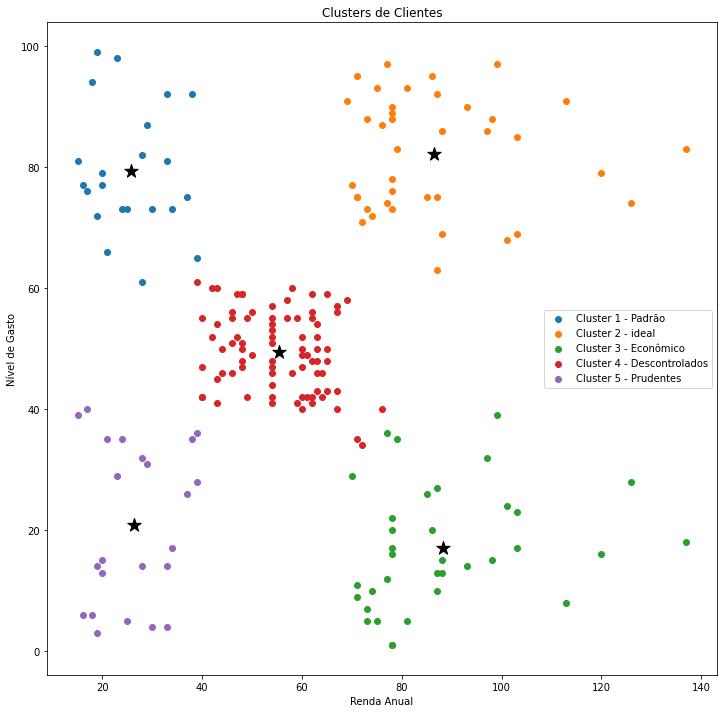

In [43]:
#Observando os clusters
plt.figure(figsize=(12,12))
plt.scatter(X[cluster_pred==0, 0], X[cluster_pred==0,1], label='Cluster 1 - Padrão')
plt.scatter(X[cluster_pred==1, 0], X[cluster_pred==1,1], label='Cluster 2 - ideal')
plt.scatter(X[cluster_pred==2, 0], X[cluster_pred==2,1], label='Cluster 3 - Econômico')
plt.scatter(X[cluster_pred==3, 0], X[cluster_pred==3,1], label='Cluster 4 - Descontrolados')
plt.scatter(X[cluster_pred==4, 0], X[cluster_pred==4,1], label='Cluster 5 - Prudentes ')
#plotando centróides
plt.scatter(cluster_centro[:,0], cluster_centro[:,1], marker='*', s=200, c='black')
plt.title('Clusters de Clientes')
plt.xlabel('Renda Anual')
plt.ylabel('Nível de Gasto')
plt.legend()
plt.show()
